# **[ 탐색적 자료 분석(EDA) ]**
> (과제2) 보험금 청구 건에 대한 자동지급, 심사, 조사분류 예측


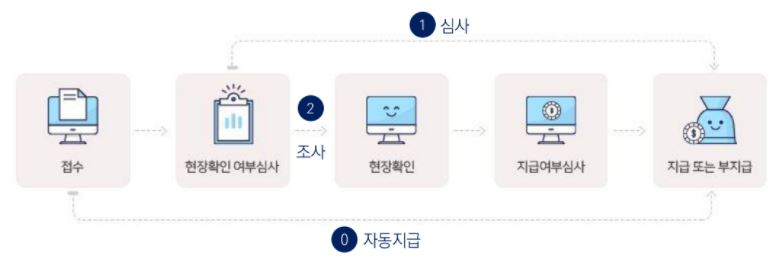


## **[ 목차 ]**
EDA 진행은 과제 설명 pdf를 따릅니다. 
0. 전반적 탐색 
1. 접수 년월
2. 질병 정보
3. 고객 정보
4. 상품 정보
5. Unknown 값 관련

In [1]:
# 필요한 라이브러리를 먼저 불러옵니다. 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 시각화
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set_palette("muted")

plt.figure(figsize=(12,5))

import warnings
warnings.filterwarnings('ignore')

<Figure size 864x360 with 0 Axes>

In [2]:
# 시각화에 사용할 함수
def count_plot(df,f):
    group=df.groupby([f,'target'])['base_ym'].count()
    group=group/group.groupby(level=0).sum()
    group=group.reset_index().rename(columns={'base_ym':'rate'})
    sns.barplot(data=group,x=f,y='rate',hue='target')
    plt.show()

------------

## **0) 전반적 탐색**
먼저 EDA의 편리성을 위해 칼럼명과 순서를 바꾸고 시작하였습니다. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/train.csv', encoding='cp949')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/test.csv', encoding='cp949')
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/sample.csv', encoding='cp949')

In [5]:
train.rename(columns = {'nur_hosp_yn': 'is_hos', 'ac_ctr_diff': 'date_con_diff', 'hsp_avg_optt_bilg_isamt_s' : 'hos_leave_mean', 'hsp_avg_surop_bilg_isamt_s':'hos_sur_mean', 
                        'ar_rclss_cd':'location', 'fds_cust_yn': 'is_sagi', 'hspz_dys_s': 'tot_hos_date', 'inamt_nvcd': 'join_price', 
                        'hsp_avg_diag_bilg_isamt_s':'hos_diag_mean', 'blrs_cd': 'treatment', 'dsas_ltwt_gcd': 'd_weight', 'dsas_avg_diag_bilg_isamt_s': 'dis_diag_mean', 
                        'dsas_acd_rst_dcd': 'd_type', 'kcd_gcd':'kcd', 'hsp_avg_hspz_bilg_isamt_s':'hos_hspz_mean', 'optt_blcnt_s':'leave_count', 
                        'mtad_cntr_yn':'is_add_con', 'heltp_pf_ntyn':'is_health_con', 'prm_nvcd':'month_price', 'surop_blcnt_s':'surgery_count', 
                        'mdct_inu_rclss_dcd' : 'hos_type', 'dsas_avg_optt_bilg_isamt_s':'dis_leave_mean', 'isrd_age_dcd':'age', 'hspz_blcnt_s':'hspz_count', 
                        'dsas_avg_surop_bilg_isamt_s':'dis_sur_mean', 'urlb_fc_yn':'is_seller', 'dsas_avg_hspz_bilg_isamt_s':'dis_hspz_mean', 'smrtg_5y_passed_yn':'is_5', 
                        'ac_rst_diff':'date_rebirth_diff', 'bilg_isamt_s':'want_price', 'optt_nbtm_s':'tot_leave'
                        }, inplace=True)

test.rename(columns = {'nur_hosp_yn': 'is_hos', 'ac_ctr_diff': 'date_con_diff', 'hsp_avg_optt_bilg_isamt_s' : 'hos_leave_mean', 'hsp_avg_surop_bilg_isamt_s':'hos_sur_mean', 
                        'ar_rclss_cd':'location', 'fds_cust_yn': 'is_sagi', 'hspz_dys_s': 'tot_hos_date', 'inamt_nvcd': 'join_price', 
                        'hsp_avg_diag_bilg_isamt_s':'hos_diag_mean', 'blrs_cd': 'treatment', 'dsas_ltwt_gcd': 'd_weight', 'dsas_avg_diag_bilg_isamt_s': 'dis_diag_mean', 
                        'dsas_acd_rst_dcd': 'd_type', 'kcd_gcd':'kcd', 'hsp_avg_hspz_bilg_isamt_s':'hos_hspz_mean', 'optt_blcnt_s':'leave_count', 
                        'mtad_cntr_yn':'is_add_con', 'heltp_pf_ntyn':'is_health_con', 'prm_nvcd':'month_price', 'surop_blcnt_s':'surgery_count', 
                        'mdct_inu_rclss_dcd' : 'hos_type', 'dsas_avg_optt_bilg_isamt_s':'dis_leave_mean', 'isrd_age_dcd':'age', 'hspz_blcnt_s':'hspz_count', 
                        'dsas_avg_surop_bilg_isamt_s':'dis_sur_mean', 'urlb_fc_yn':'is_seller', 'dsas_avg_hspz_bilg_isamt_s':'dis_hspz_mean', 'smrtg_5y_passed_yn':'is_5', 
                        'ac_rst_diff':'date_rebirth_diff', 'bilg_isamt_s':'want_price', 'optt_nbtm_s':'tot_leave'
                        }, inplace=True)

In [6]:
train = train[['ID', 'base_ym', 'age', 'want_price', 'join_price', 'month_price', 'date_con_diff',  'date_rebirth_diff', 
               'is_hos', 'is_sagi', 'is_add_con', 'is_health_con', 'is_seller', 'is_5',
               'd_type', 'd_weight', 'kcd', 'location', 'hos_type', 'treatment', 
               'leave_count', 'hspz_count', 'surgery_count', 'tot_leave', 'tot_hos_date',
               'hos_diag_mean','hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean',
               'dis_diag_mean', 'dis_leave_mean', 'dis_hspz_mean', 'dis_sur_mean', 'target']]

test = test[['ID', 'base_ym', 'age', 'want_price', 'join_price', 'month_price', 'date_con_diff',  'date_rebirth_diff', 
               'is_hos', 'is_sagi', 'is_add_con', 'is_health_con', 'is_seller', 'is_5',
               'd_type', 'd_weight', 'kcd', 'location', 'hos_type', 'treatment', 
               'leave_count', 'hspz_count', 'surgery_count', 'tot_leave', 'tot_hos_date',
               'hos_diag_mean','hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean',
               'dis_diag_mean', 'dis_leave_mean', 'dis_hspz_mean', 'dis_sur_mean']]

###  데이터 구성 
- train : 2019년 1월~11월까지의 월별 보험금 청구(신청) 데이터
- test : 2019년 12월의 보험청구 내역


In [7]:
display(train.head())
display(test.head())

,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean,target
0,0,201901,3,0.4240,4,1,6,0,0,0,0,0,0,0,1,1,3,1,2,12,2.0,10.0000,0.0,0.8571,0.3452,0.0000,0.1303,1.6021,0.0000,0.9793,1.2002,1.2612,1.1701,1
1,1,201901,4,0.8602,4,1,6,0,1,0,0,0,0,0,22,3,8,4,1,2,0.0,0.0000,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.5770,0.0000,0.0000,0.0023,0.1508,0
2,2,201901,4,0.4301,6,1,6,0,1,1,0,0,0,0,22,3,8,1,1,2,0.0,0.0000,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.2885,0.0000,0.0000,0.0023,0.1508,1
3,3,201901,9,0.2509,6,1,4,0,0,0,0,0,0,0,23,3,8,2,2,8,0.0,1.4444,0.0,0.0000,0.8056,0.0587,0.0197,0.5638,0.0680,0.0000,0.0000,0.1920,0.0863,1
4,4,201901,0,0.0323,2,2,5,0,0,0,0,0,0,0,23,3,8,9,2,8,0.0,1.3333,0.0,0.0000,0.4167,0.0000,0.0000,0.4464,0.0000,0.0000,0.0000,0.1920,0.0863,1


,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean
0,0,201912,2,0.4242,9,1,5,0,1,0,0,0,0,0,28,3,4,1,1,2,0.0,0.0000,1.0548,0.0,0.0000,0.0000,0.0000,0.0000,0.2938,0.0000,0.0000,0.1309,0.1397
1,1,201912,2,1.7688,6,1,6,0,0,0,0,0,0,0,5,1,9,1,3,2,0.0,0.0000,1.0000,0.0,0.0000,1.3936,1.5266,0.7517,2.1745,1.1121,0.5200,0.5344,1.0923
2,2,201912,2,43.0108,3,1,6,0,0,0,0,0,0,0,1,1,3,1,3,1,0.0,0.0000,0.0000,0.0,0.0000,1.0524,1.6061,1.2090,1.6884,1.1091,1.1593,1.1660,1.2975
3,3,201912,4,4.1867,4,1,6,0,0,0,0,0,0,0,1,1,3,3,2,10,0.0,0.6667,1.2660,0.0,0.1847,0.3889,0.1228,0.2785,0.8927,1.1091,1.1593,1.1660,1.2975
4,4,201912,2,0.4431,2,1,6,0,1,0,0,0,0,0,27,3,14,1,1,2,0.0,0.0000,1.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.2440,0.0000,0.0000,0.1309,0.1397


###  데이터 특징 
1. 
train데이터의 개수는 37만개로 충분한 상황입니다.       
그만큼 12월 예측에 노이즈로 작용하는 데이터가 있을 수 있다고 생각했습니다. 

In [8]:
print(train.shape, test.shape)

(377928, 34) (22072, 33)


2. 결측치는 train, test 모두 존재하지 않습니다. 

In [9]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377928 entries, 0 to 377927
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 377928 non-null  int64  
 1   base_ym            377928 non-null  int64  
 2   age                377928 non-null  int64  
 3   want_price         377928 non-null  float64
 4   join_price         377928 non-null  int64  
 5   month_price        377928 non-null  int64  
 6   date_con_diff      377928 non-null  int64  
 7   date_rebirth_diff  377928 non-null  int64  
 8   is_hos             377928 non-null  int64  
 9   is_sagi            377928 non-null  int64  
 10  is_add_con         377928 non-null  int64  
 11  is_health_con      377928 non-null  int64  
 12  is_seller          377928 non-null  int64  
 13  is_5               377928 non-null  int64  
 14  d_type             377928 non-null  int64  
 15  d_weight           377928 non-null  int64  
 16  kc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 22072 non-null  int64  
 1   base_ym            22072 non-null  int64  
 2   age                22072 non-null  int64  
 3   want_price         22072 non-null  float64
 4   join_price         22072 non-null  int64  
 5   month_price        22072 non-null  int64  
 6   date_con_diff      22072 non-null  int64  
 7   date_rebirth_diff  22072 non-null  int64  
 8   is_hos             22072 non-null  int64  
 9   is_sagi            22072 non-null  int64  
 10  is_add_con         22072 non-null  int64  
 11  is_health_con      22072 non-null  int64  
 12  is_seller          22072 non-null  int64  
 13  is_5               22072 non-null  int64  
 14  d_type             22072 non-null  int64  
 15  d_weight           22072 non-null  int64  
 16  kcd                220

None

3. 기본적으로 train과 test의 분포는 유사해 보입니다.    
   다만 몇몇 칼럼에서 unknown 값이 존재합니다. 이들을 잘 처리하는 것이 중요하다고 생각했습니다.   
   > 지역 구분코드(9), 의료기관 구분코드(9), 보험료 구간코드(99), 가입금액구간코드(99)에 unknown 값이 존재합니다. 

In [10]:
# 수정부분 
display(train[['join_price','month_price','hos_type','location']].describe())
display(test[['join_price','month_price','hos_type','location']].describe())

,join_price,month_price,hos_type,location
count,377928.000000,377928.000000,377928.000000,377928.000000
mean,12.295186,10.142136,1.918985,3.212898
std,27.555442,28.151947,0.684116,2.785383
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,2.000000,2.000000
75%,6.000000,1.000000,2.000000,4.000000
max,99.000000,99.000000,9.000000,9.000000


,join_price,month_price,hos_type,location
count,22072.000000,22072.000000,22072.000000,22072.000000
mean,9.072626,6.910837,1.864942,2.959632
std,22.503065,22.950783,0.671375,2.558907
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,2.000000,2.000000
75%,5.000000,1.000000,2.000000,4.000000
max,99.000000,99.000000,3.000000,9.000000


4. target은 심사, 자동지급, 조사 순으로 많습니다.

다소 불균형한 모습을 보입니다. 

1    226036
0     93793
2     58099
Name: target, dtype: int64


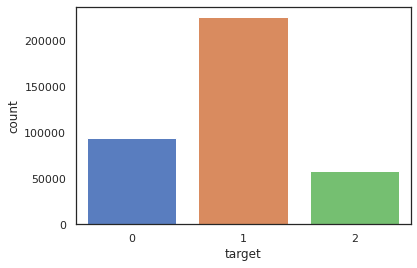

In [11]:
print(str(train.target.value_counts()))
sns.countplot(data=train, x='target')

5. 특성변수(피쳐)간 전반적인 상관관계는 다음과 같습니다.   

상관관계가 높은 피쳐가 보이므로, 회귀 모델을 사용한다면 공선성 고려에 주의해야할 듯 합니다. 

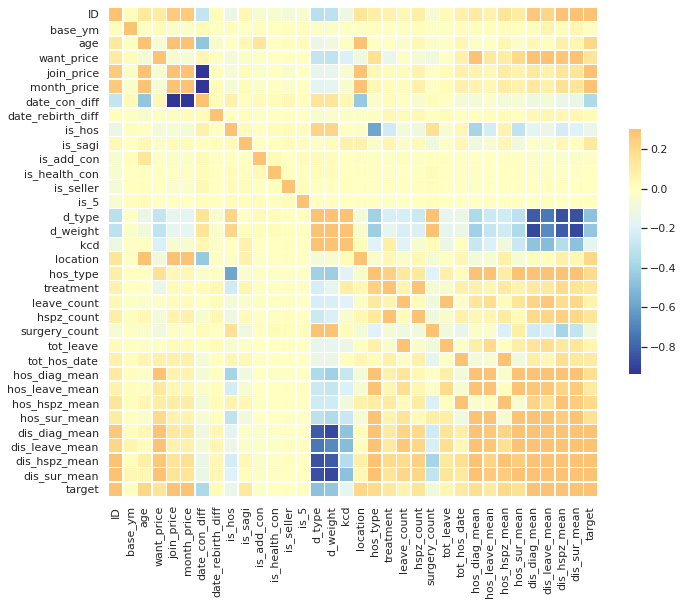

In [12]:
corr = train.corr()
f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap='RdYlBu_r', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

-----------

## **1) 접수 년월**
> 12월을 예측하는 것이기에, 월별 특성이 있다면 파악하는 것이 중요하다고 생각했습니다. 


  
- 우선 월별로 주어진 데이터 양에 차이가 있습니다.       
특히 test로 주어진 12월의 데이터는 22000개로, train에 주어진 월별 개수보다 적습니다.  

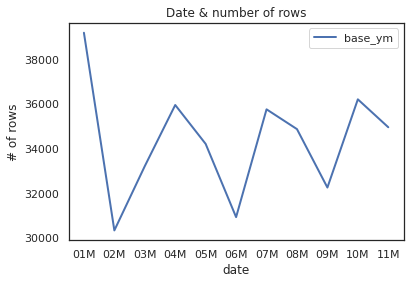

In [13]:
train['base_ym'].value_counts().sort_index().plot(color='b', lw=2)
plt.legend()
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.xlabel('date')
plt.ylabel('# of rows')
plt.title('Date & number of rows')
plt.show()

- 하지만 월 별 타겟의 분포는 비슷합니다. 

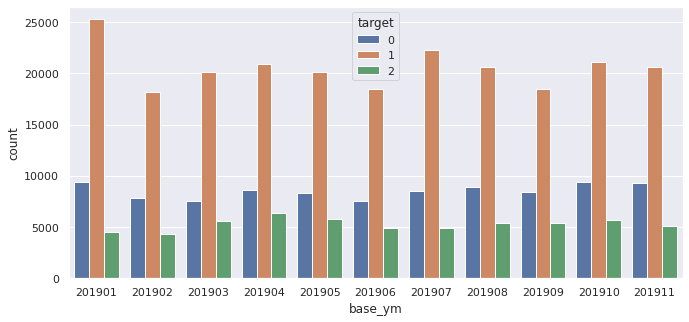

In [14]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(data=train, x='base_ym', hue='target')

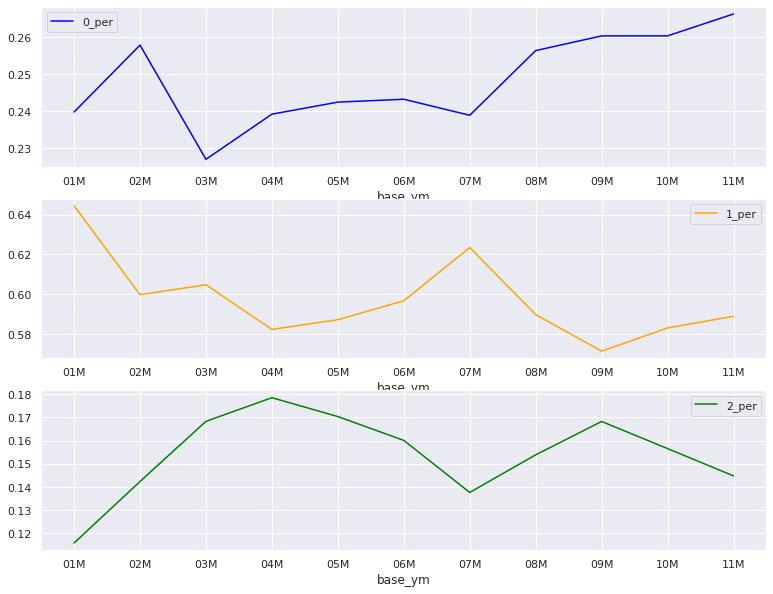

In [15]:
# 비율 DataFrame 생성
f1 = train.pivot_table( index='base_ym', columns = 'target', values='ID', aggfunc='count', fill_value=0, margins=True)
aa = [];bb = [];cc = []
for i in range(len(f1)):
  a = f1.iloc[i, 0]/f1.iloc[i, 3]
  b = f1.iloc[i, 1]/f1.iloc[i, 3]
  c = f1.iloc[i, 2]/f1.iloc[i, 3]
  aa.append(a);bb.append(b);cc.append(c)

f1['0_per'] = aa
f1['1_per'] = bb
f1['2_per'] = cc
f1 = f1.iloc[:-1]

# 비율 경향성 파악
plt.figure(figsize=(13, 10))
plt.subplot(3, 1, 1)
f1['0_per'].plot(color='blue')
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.legend()
plt.subplot(3, 1, 2)
f1['1_per'].plot(color='orange')
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.legend()
plt.subplot(3, 1, 3)
f1['2_per'].plot(color='green')
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.legend()

- 위와 같이 타겟별로 월에 따라 비율 변화 양상을 그래프로 나타낸 결과,     
10월부터 **자동지급과 심사 비율은 증가**한 반면 **조사의 비율은 감소**한 것으로 보입니다.       
(11월 이후 그려진 그래프 선은 무시하셔도 됩니다.)

> 자동지급과 심사비율이 증가 추세를 보이는건, **조사 기준이 완화되었을 거라고 추측**할 수 있습니다.       
실제로 Q&A 게시판을 통해 자동지급 기준과 관련한 다음과 같은 정보를 얻었습니다.     

```
 < 2019년 10월 29일 이후 변경된 자동지급 분류기준 >
- 특수조사 이력 고객에 대한 기준의 추가  
- 실손금액 기준 변경  
- 질병이력 관련 기준 삭제
```
> 이는 **11월**부터 미래에셋 내의 분류 기준이 바뀌었음을 뜻하는 **중요한 정보라고 생각**했습니다.     
또한 보험계의 부수적인 정보로서, 건강보험료는 11월을 기준으로 과표조정을 진행합니다.      
이러한 정보를 바탕으로 차후 모델링을 진행하였습니다. 





------





## **2) 질병 정보**
### 가. 질병 분류 정보
> 질병경중등급코드(d_weight),  KCD등급코드(kcd),  질병구분코드(d_type) 로 구성됩니다. 


타겟별 질병 분류 정보 분포는 다음과 같습니다. 

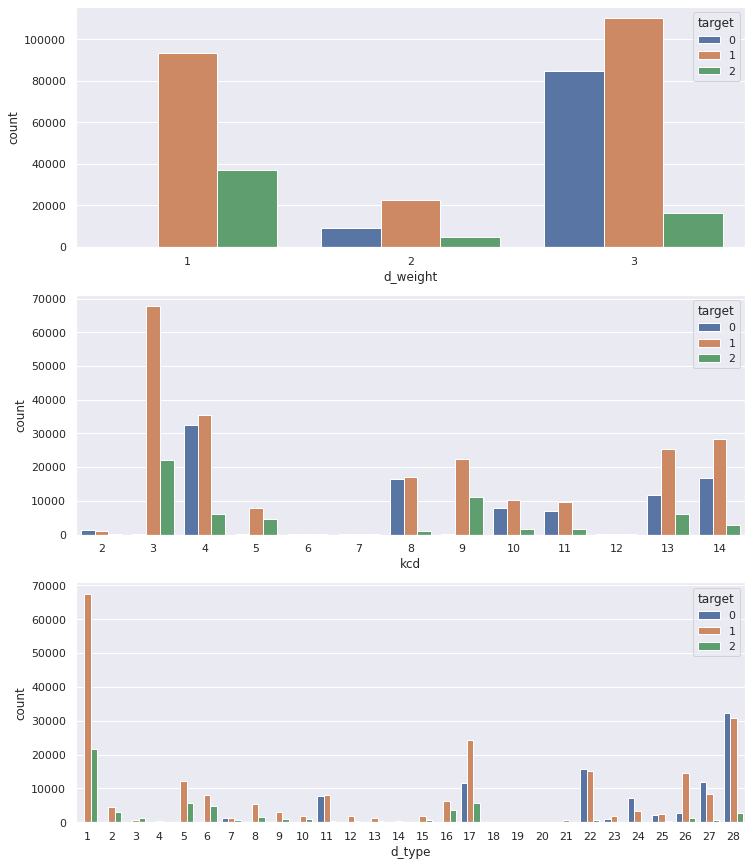

In [16]:
f, ax=plt.subplots(3, 1, figsize=(12, 15))
ax = ax.flatten()
sns.countplot(data=train, x='d_weight', hue='target', ax=ax[0])
sns.countplot(data=train, x='kcd', hue='target', ax=ax[1])
sns.countplot(data=train, x='d_type', hue='target', ax=ax[2])

- **중증 질병**은 자동지급으로 거의 분류되지 않습니다. 조사는 중증 질병에서 제일 많이 나타납니다. 

- 암(1), 관절염(17), 심한 남성 비뇨기계(26) 질병에서 **심사**가 조사보다 **눈에띄게 많습니다.**   

  특히 **암**이 차지하는 비율이 제일 높은것으로 보아, 암보험 상품이 포함되어있을 것이라고 추측할 수 있습니다. 

- 질병 구분 코드 중 유일하게 **경계성(3)**에서 조사가 심사보다 높습니다.      
경계성은 '정서·행동·대인관계가 매우 불안정하고 변동이 심한 이상 성격'을 보이는 질병으로 조사의 이유가 명확해보입니다. 

     > 타겟의 분류에 질병의 증상이나 특성이 반영되는 듯 합니다. 

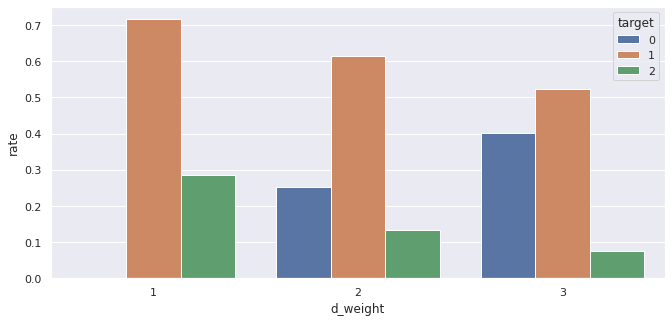

In [17]:
count_plot(train,'d_weight')

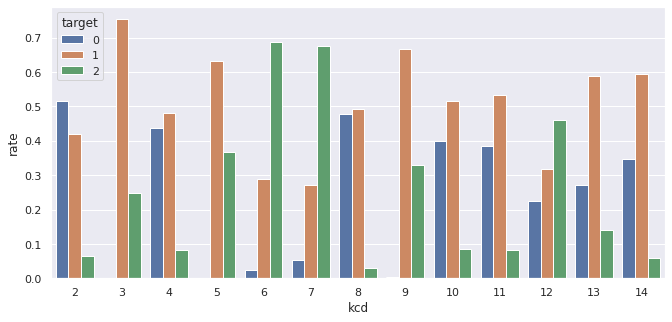

In [18]:
count_plot(train, 'kcd')

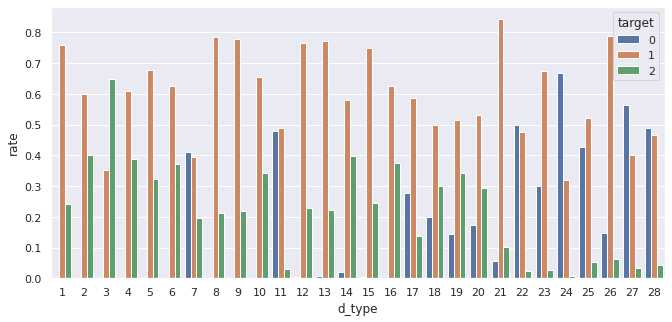

In [19]:
count_plot(train, 'd_type')

#### cf) ***KCD 등급코드(한국표준질병사인분류)*** 에 관하여       
> 사전조사 결과, 보험 상품에서 KCD등급코드는 질병에 대한 판단 기준으로 중요하게 작용합니다.    
KCD 등급코드의 대분류는 다음과 같습니다.      
- 전신을 침해한 질환 : A,B,C,D (감염성, 기생충, 신생물(=종양과 관련한 것))   
- 전신병적 질환 : E (내분비(호르몬 관련))   
- 인체 해부학적 계통별 질환 : F~N (부위별 (정신, 신경계, 순환계, 호흡기, 피부)   
- 분만, 기형, 신생아 질환 : O, P, Q (임신, 출산, 주산기, 선천)   
- 기타 질환 : R   
[출처](https://www.kcdcode.kr/browse/contents/69)  

이러한 사전조사 결과도 모델에 반영하려고 노력했습니다. 


같은 질병 유형이라고 모두 같은 kcd등급을 가지는 것은 아닙니다.  
다음은 한 질병 내 가장 많이 차지하는 kcd등급을 나타낸 데이터프레임입니다. 

In [20]:
disease_group=train.groupby(['d_type','kcd'])['base_ym'].count()
disease_group=disease_group/disease_group.groupby(level=0).sum()
disease_group=disease_group.reset_index().rename(columns={'base_ym':'rate'})

d = disease_group[disease_group['rate']>0.7]  

In [21]:
d.rename(columns={'d_type':'질병구분', 'kcd':'해당 KCD', 'rate':'비율'})

,질병구분,해당 KCD,비율
1,1,3,0.999427
5,2,4,0.853603
10,3,4,0.892553
27,5,9,0.993238
34,6,9,0.989145
37,7,2,0.780245
54,8,11,0.903692
66,9,14,0.927506
67,10,5,0.912565
80,11,10,0.997077


### 나. 발생 지역 정보
지역에 따라 의료수준의 차이, 보험 고객 구성의 차이가 발생할 것이라고 가정했습니다. 

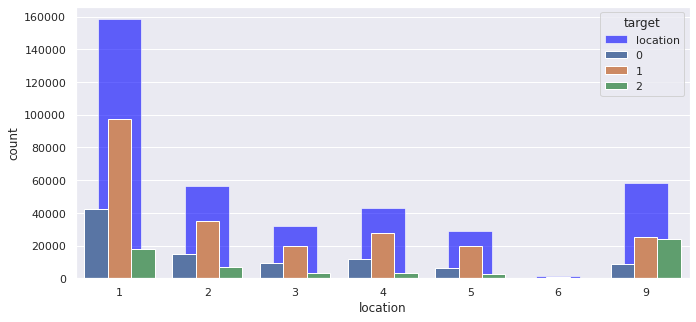

In [22]:
train['location'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
sns.countplot(data=train, x='location', hue='target')
plt.xticks(rotation=0)
plt.show()

서울특별시와 경기도가 가장 많은 비율을 차지합니다. (파란색은 전체 count를 나타냅니다.)    
특히 9(기타) 지역이 차지하는 비율이 꽤 높고, 그 안에 차지하는 조사의 비율도 높습니다.   
이러한 unknown 값이 대한 처리가 필요해보입니다. 

In [23]:
train['location'].value_counts().sort_index()/train['location'].value_counts().sort_index().sum()

1    0.418635
2    0.149105
3    0.084961
4    0.113085
5    0.076771
6    0.004003
9    0.153439
Name: location, dtype: float64

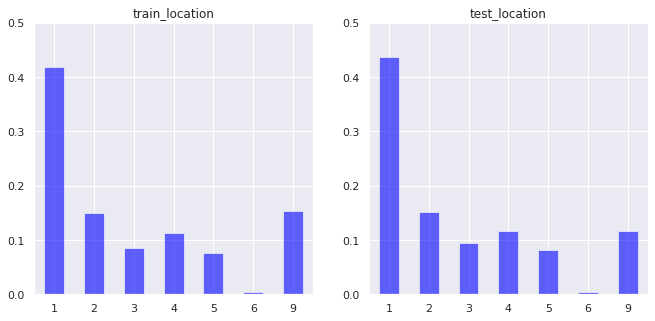

In [24]:
plt.subplot(1,2,1)
(train['location'].value_counts().sort_index()/train['location'].value_counts().sort_index().sum()).plot.bar(color='blue',alpha=0.6)
plt.title('train_location')
plt.xticks(rotation=0)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])

plt.subplot(1,2,2)
(test['location'].value_counts().sort_index()/test['location'].value_counts().sort_index().sum()).plot.bar(color='blue',alpha=0.6)
plt.title('test_location')
plt.xticks(rotation=0)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])

plt.show()

위와 같이 train과 test 모두 비슷한 분포를 보입니다. 

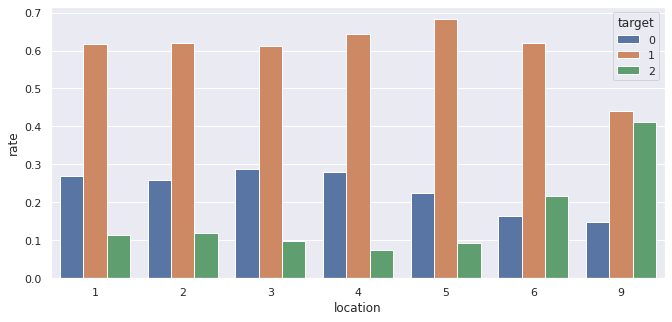

In [25]:
count_plot(train, 'location')

### 다. 치료행위정보

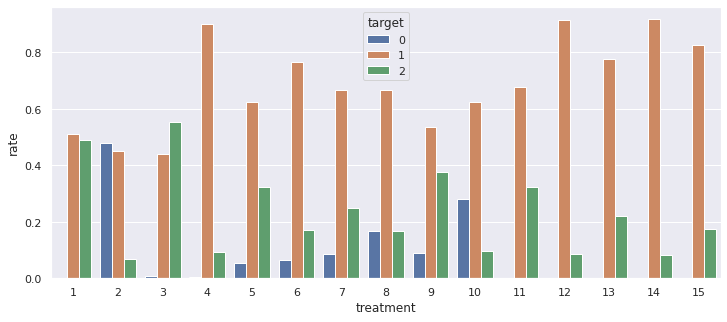

In [26]:
plt.figure(figsize=(12, 5))
count_plot(train,'treatment')

치료 행위 범주별 count차이가 많이나므로, 각 치료 행위에서 target이 차지하는 **비율로 시각화**합니다.     

- 수술치료만 진행한 경우(2) **자동지급**의 비율이 높습니다.     
수술만 진행한 것으로 보아 위급하거나 질병이 명확한 경우로 추측할 수 있습니다.      

- 진단을 받고 수술치료를 진행한경우(3) **조사**의 비율이 높습니다.     
입원 과정 없이 바로 수술을 진행한 점이 의심스러운 요소로 작용할 수 있다고 생각했습니다. 

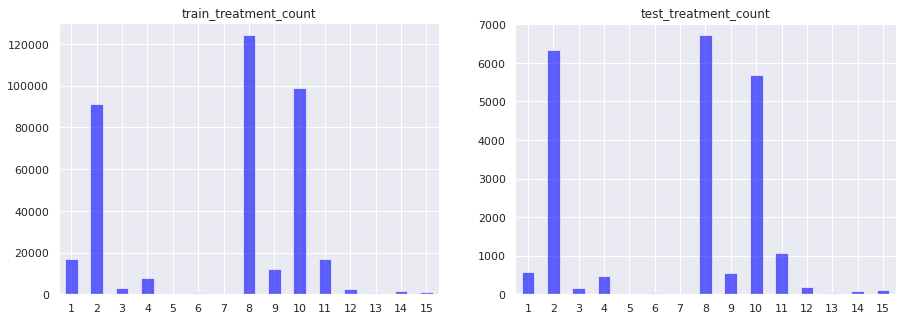

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
train['treatment'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
plt.title('train_treatment_count')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
test['treatment'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
plt.title('test_treatment_count')
plt.xticks(rotation=0)

plt.show()

위와 같이 train, test 모두 비슷한 치료행위 count 양상을 보입니다. 

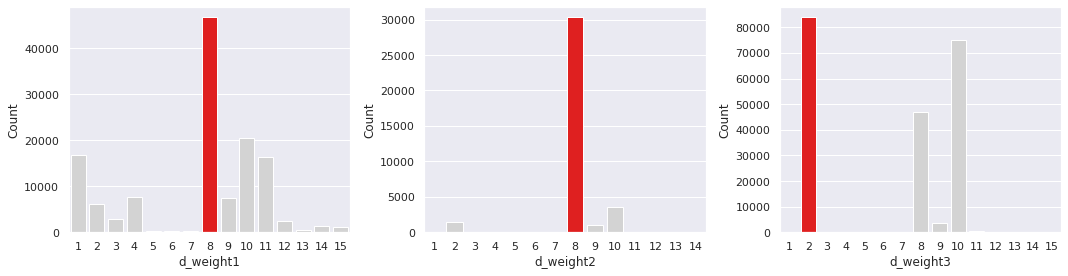

In [28]:
plt.figure(figsize=(15,4))

for i,cat in enumerate([1,2,3]):
  ax=plt.subplot(1,3,i+1)
  d=train[train['d_weight']==cat].groupby(['treatment'])['base_ym'].count().reset_index().rename(columns={'base_ym':'Count'})
  colors=['red' if (x == max(d['Count']))
        else 'lightgrey'  for x in d['Count']]
  sns.barplot(data=d,x='treatment',y='Count',palette=colors,ax=ax)
  plt.xlabel('d_weight' + str(cat))
  plt.tight_layout()
plt.show()

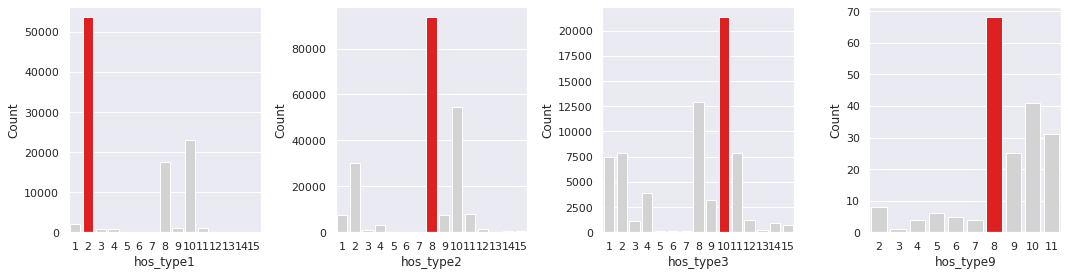

In [29]:
plt.figure(figsize=(15,4))

for i,cat in enumerate([1,2,3,9]):
  ax=plt.subplot(1,4,i+1)
  d=train[train['hos_type']==cat].groupby(['treatment'])['base_ym'].count().reset_index().rename(columns={'base_ym':'Count'})
  colors=['red' if (x == max(d['Count']))
        else 'lightgrey'  for x in d['Count']]
  sns.barplot(data=d,x='treatment',y='Count',palette=colors,ax=ax)
  plt.xlabel('hos_type' + str(cat))
  plt.tight_layout()
plt.show()

In [30]:
d

,treatment,Count
0,2,8
1,3,1
2,4,4
3,5,6
4,6,5
5,7,4
6,8,68
7,9,25
8,10,41
9,11,31


질병 경중별 치료 행위를 시각화한 결과, **질병 경중이 가장 낮은 생활 등급**에서 수술치료만 진행한 횟수가 많습니다.   
경중이 가장 낮은 등급이 수술치료만 진행한 점이 의심스럽습니다. 

### 라. 의료기관

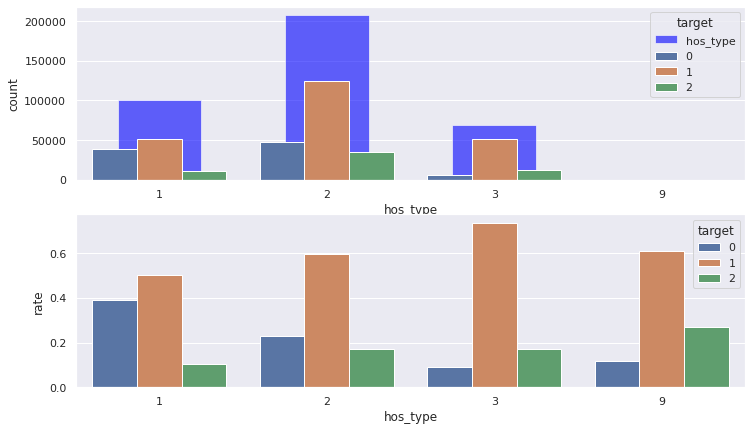

In [31]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1) # count
train['hos_type'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
sns.countplot(data=train, x='hos_type', hue='target')
plt.xticks(rotation=0)

plt.subplot(2,1,2) # rate
count_plot(train, 'hos_type')


- Count plot으로 보면 9(unknown)에 해당하는 값이 보이지 않습니다.(실제로 전체 데이터의 차지 비율은 적습니다.)         
하지만 rate plot으로 보면 9에 해당하는 범주의 **조사 비율이 높음**을 확인할 수 있습니다. 

- 대회 Q&A 게시판에 따르면 의료기관구분코드의 경우 기관으로부터 제공받는 의료기관 정보이므로, 미등록 의료기관의 경우 Unknown이 입력될 수 있습니다. 1,2,3차병원 이외에 **약국, 보건지소, 보건진료소**의 경우 Unknown에 해당될 수 있다는 정보를 얻었습니다. 

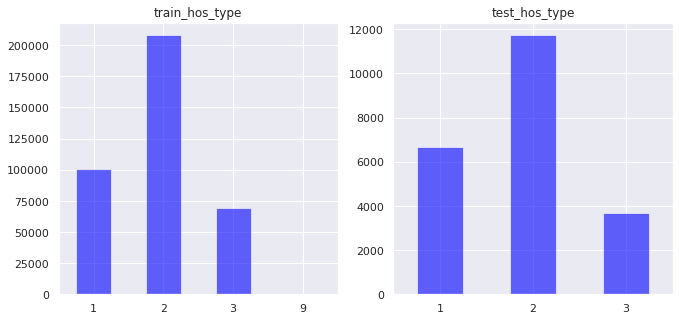

In [32]:
plt.subplot(1,2,1)
train['hos_type'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
plt.xticks(rotation=0)
plt.title('train_hos_type')

plt.subplot(1,2,2)
test['hos_type'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
plt.xticks(rotation=0)
plt.title('test_hos_type')
plt.show()

In [33]:
test.query('hos_type==9')

,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean


In [34]:
train.query('hos_type==9')

,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean,target
311,311,201901,5,0.0430,1,1,6,6,0,0,0,0,0,0,5,1,9,1,9,8,0.0,0.6667,0.0000,0.0,0.3333,0.0000,0.8108,2.6087,0.4808,0.9572,0.2679,0.6279,1.1850,1
1100,1100,201901,5,0.0323,3,1,6,0,0,0,0,0,0,0,17,3,13,1,9,10,0.0,0.6667,1.0000,0.0,0.5000,0.0000,0.8108,2.6087,0.4808,0.0000,0.1080,0.5008,0.1481,1
1255,1255,201901,3,0.1290,3,1,6,0,0,0,0,0,0,0,1,1,3,1,9,4,1.0,0.0000,0.0000,4.0,0.0000,0.0000,0.8108,2.6087,0.4808,0.9793,1.2002,1.2612,1.1701,1
1297,1297,201901,4,3.6559,2,1,6,0,0,0,0,0,0,0,1,1,3,1,9,8,0.0,0.6667,0.0000,0.0,16.7500,0.0000,0.8108,2.6087,0.4808,0.9793,1.2002,1.2612,1.1701,1
3356,3356,201901,4,1.6129,2,1,6,0,0,0,0,0,0,0,27,3,14,1,9,2,0.0,0.0000,1.0000,0.0,0.0000,0.0000,0.8108,2.6087,0.4808,0.0000,0.0000,0.1118,0.1368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373446,373446,201902,7,0.0000,99,99,0,0,0,0,0,0,0,0,6,1,9,9,9,9,0.0,0.8610,1.4169,0.0,0.6110,0.5509,0.0479,1.0337,0.9985,0.8123,0.0000,1.4913,1.2317,2
374378,374378,201907,3,7.1869,2,1,6,6,0,0,0,0,0,0,5,1,9,1,9,11,0.0,0.6667,1.0000,0.0,0.1311,1.0149,0.6144,0.6868,2.0082,0.8957,0.0000,0.5200,1.0081,2
374503,374503,201906,4,8.2964,2,1,5,0,0,0,0,0,0,0,5,1,9,1,9,11,0.0,0.6667,1.0000,0.0,0.1833,1.0201,0.1249,0.4698,1.7658,0.9036,0.0000,0.8278,1.1110,2
375793,375793,201908,3,9.4967,2,1,6,6,0,0,0,0,0,0,5,1,9,1,9,9,0.0,0.6667,0.3752,0.0,0.3229,0.9552,0.2111,0.8458,1.6505,0.8909,0.0000,1.0804,1.0447,2


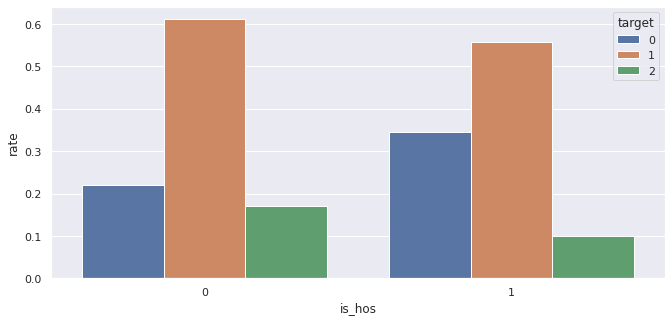

In [35]:
count_plot(train, 'is_hos')

- 하지만 test 데이터에는 의료기관 코드가 9인 unknown 데이터가 존재하지 않습니다. 

### 마. 병원별 집계 정보
- hos_diag_mean : 병원별 진단 청구보험금
- hos_leave_mean : 병원별 통원 청구보험금
- hos_hspz_mean : 병원별 입원 청구보험금
- hos_sur_mean : 병원별 수술 청구보험금


<Figure size 792x360 with 0 Axes>

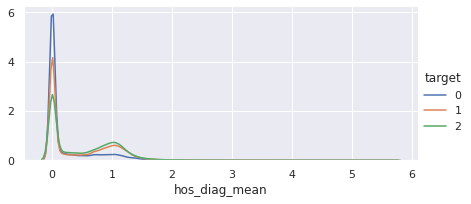

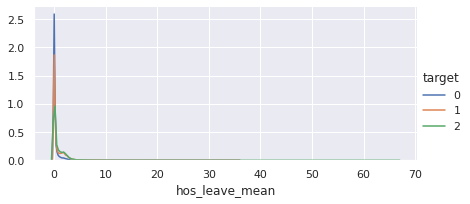

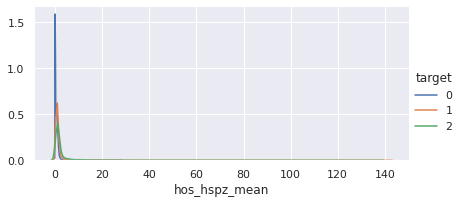

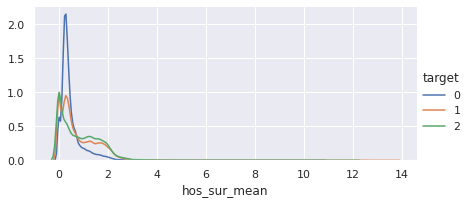

In [36]:
hos_price_col = ['hos_diag_mean', 'hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean', 'target']
about_price = train[hos_price_col]
plt.figure(figsize=(11,5))
for i in ['hos_diag_mean', 'hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean']:
  facet = sns.FacetGrid(about_price, hue='target', size=3, aspect=2)
  facet.map(sns.kdeplot, i)
  facet.add_legend()
  plt.show()

- Kdeplot은 밀도를 나타내는 그래프입니다. 
- Kdeplot으로 보아 자동지급이 심사, 조사에 비해 튀는 구간이 두드러지게 보입니다.      
이러한 점을 잘 잡을 수 있는 모델을 선택하는 것이 효율적일 것이라고 생각했습니다. 

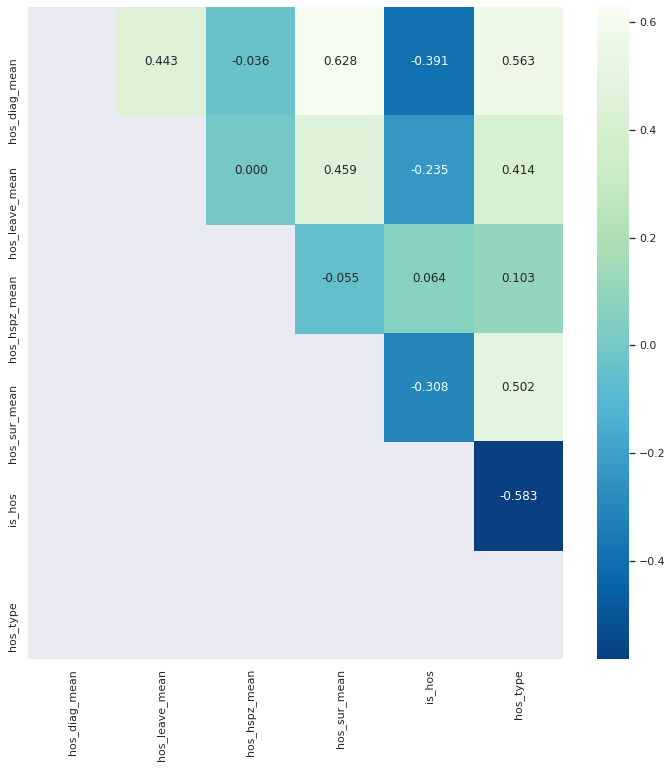

In [37]:
corr_mat=train[['hos_diag_mean', 'hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean', 'is_hos', 'hos_type']].corr()
mask=np.zeros_like(corr_mat,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,annot=True,cmap='GnBu_r',mask=mask,fmt='.3f')
plt.show()

- 의료 기관과 관련된 특징(요양병원 여부, 의료기관 구분코드)과 상관관계를 나타낸결과, 병원별 진단, 수술 청구보험금과 의료기관 구분코드가 약 0.5정도의 상관관계를 보입니다.     
   
- 특히 병원별 **진단, 수술 청구보험금**의 상관관계가 0.6정도로 다소 높습니다. 

### 바. 질병별 집계 정보
- dis_diag_mean : 질병별 진단 청구보험금
- dis_leave_mean : 질병별 통원 청구보험금
- dis_hspz_mean : 질병별 입원 청구보험금
- dis_sur_mean : 질병별 수술 청구보험금

<Figure size 792x360 with 0 Axes>

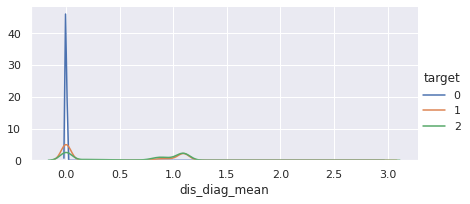

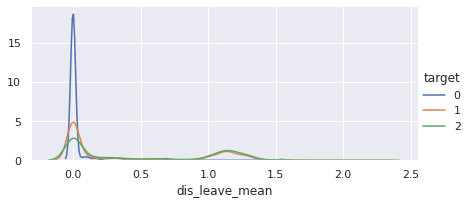

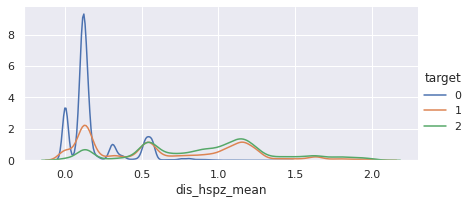

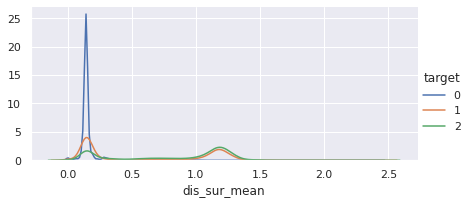

In [38]:
dis_price_col = ['dis_diag_mean', 'dis_leave_mean', 'dis_hspz_mean', 'dis_sur_mean', 'target']
about_price = train[dis_price_col]
plt.figure(figsize=(11,5))
for i in ['dis_diag_mean', 'dis_leave_mean', 'dis_hspz_mean', 'dis_sur_mean']:
  facet = sns.FacetGrid(about_price, hue='target', size=3, aspect=2)
  facet.map(sns.kdeplot, i)
  facet.add_legend()
  plt.show()

In [39]:
train.describe()

,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean,target
count,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000
mean,188963.500000,201905.996917,3.769464,1.752007,12.295186,10.142136,5.216343,0.447940,0.233259,0.028707,0.007480,0.001876,0.010872,0.002839,14.881570,2.213183,7.558352,3.212898,1.918985,6.875079,0.048891,0.755198,0.751618,0.279641,0.974648,0.402857,0.617748,1.201778,0.724437,0.353262,0.335058,0.584304,0.529102,0.905553
std,109098.560604,3.196367,1.759928,5.641433,27.555442,28.151947,1.769891,1.541944,0.422906,0.166981,0.086165,0.043272,0.103703,0.053208,10.620314,0.926064,4.198521,2.785383,0.684116,3.477374,0.258888,1.055823,0.782821,2.391219,4.841651,0.535260,1.353445,2.705497,0.741922,0.505435,0.501107,0.502351,0.484076,0.626888
min,0.000000,201901.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001400,0.000000,0.000000
25%,94481.750000,201903.000000,3.000000,0.176800,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.282200,0.223100,0.000000,0.000000,0.125600,0.141900,1.000000
50%,188963.500000,201906.000000,4.000000,0.385700,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.000000,8.000000,2.000000,2.000000,8.000000,0.000000,0.666700,1.000000,0.000000,0.208300,0.000000,0.041700,0.804400,0.445900,0.000000,0.000000,0.522100,0.167100,1.000000
75%,283445.250000,201909.000000,4.000000,0.918625,6.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,3.000000,11.000000,4.000000,2.000000,10.000000,0.000000,0.953300,1.000000,0.000000,0.897200,0.856100,0.712400,1.240100,1.138700,0.972300,0.765100,1.049900,1.123600,1.000000
max,377927.000000,201911.000000,9.000000,107.526900,99.000000,99.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,3.000000,14.000000,9.000000,9.000000,15.000000,7.000000,35.333300,21.666700,90.000000,417.083300,5.647200,66.486500,142.687000,13.704100,2.948900,2.237500,2.034400,2.440600,2.000000


In [40]:
train.columns

Index(['ID', 'base_ym', 'age', 'want_price', 'join_price', 'month_price',
       'date_con_diff', 'date_rebirth_diff', 'is_hos', 'is_sagi', 'is_add_con',
       'is_health_con', 'is_seller', 'is_5', 'd_type', 'd_weight', 'kcd',
       'location', 'hos_type', 'treatment', 'leave_count', 'hspz_count',
       'surgery_count', 'tot_leave', 'tot_hos_date', 'hos_diag_mean',
       'hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean', 'dis_diag_mean',
       'dis_leave_mean', 'dis_hspz_mean', 'dis_sur_mean', 'target'],
      dtype='object')

<Figure size 792x360 with 0 Axes>

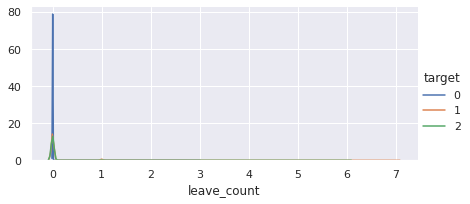

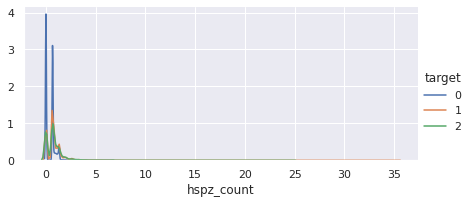

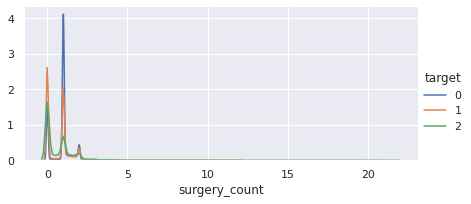

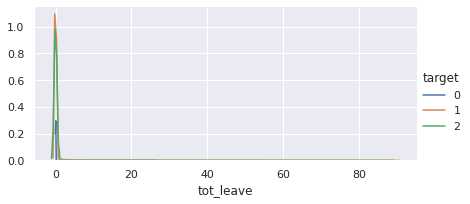

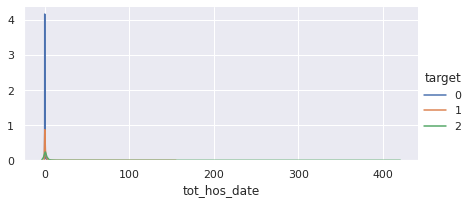

In [41]:
dis_price_col = ['leave_count', 'hspz_count',
       'surgery_count', 'tot_leave', 'tot_hos_date', 'target']
about_price = train[dis_price_col]
plt.figure(figsize=(11,5))
for i in ['leave_count', 'hspz_count',
       'surgery_count', 'tot_leave', 'tot_hos_date']:
  facet = sns.FacetGrid(about_price, hue='target', size=3, aspect=2)
  facet.map(sns.kdeplot, i)
  facet.add_legend()
  plt.show()

In [42]:
train.describe()

,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean,target
count,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000,377928.000000
mean,188963.500000,201905.996917,3.769464,1.752007,12.295186,10.142136,5.216343,0.447940,0.233259,0.028707,0.007480,0.001876,0.010872,0.002839,14.881570,2.213183,7.558352,3.212898,1.918985,6.875079,0.048891,0.755198,0.751618,0.279641,0.974648,0.402857,0.617748,1.201778,0.724437,0.353262,0.335058,0.584304,0.529102,0.905553
std,109098.560604,3.196367,1.759928,5.641433,27.555442,28.151947,1.769891,1.541944,0.422906,0.166981,0.086165,0.043272,0.103703,0.053208,10.620314,0.926064,4.198521,2.785383,0.684116,3.477374,0.258888,1.055823,0.782821,2.391219,4.841651,0.535260,1.353445,2.705497,0.741922,0.505435,0.501107,0.502351,0.484076,0.626888
min,0.000000,201901.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001400,0.000000,0.000000
25%,94481.750000,201903.000000,3.000000,0.176800,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.282200,0.223100,0.000000,0.000000,0.125600,0.141900,1.000000
50%,188963.500000,201906.000000,4.000000,0.385700,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.000000,8.000000,2.000000,2.000000,8.000000,0.000000,0.666700,1.000000,0.000000,0.208300,0.000000,0.041700,0.804400,0.445900,0.000000,0.000000,0.522100,0.167100,1.000000
75%,283445.250000,201909.000000,4.000000,0.918625,6.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,3.000000,11.000000,4.000000,2.000000,10.000000,0.000000,0.953300,1.000000,0.000000,0.897200,0.856100,0.712400,1.240100,1.138700,0.972300,0.765100,1.049900,1.123600,1.000000
max,377927.000000,201911.000000,9.000000,107.526900,99.000000,99.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,3.000000,14.000000,9.000000,9.000000,15.000000,7.000000,35.333300,21.666700,90.000000,417.083300,5.647200,66.486500,142.687000,13.704100,2.948900,2.237500,2.034400,2.440600,2.000000


병원별 집계량과 같이 자동지급의 밀도가 특정 구간에서 매우 높습니다. 

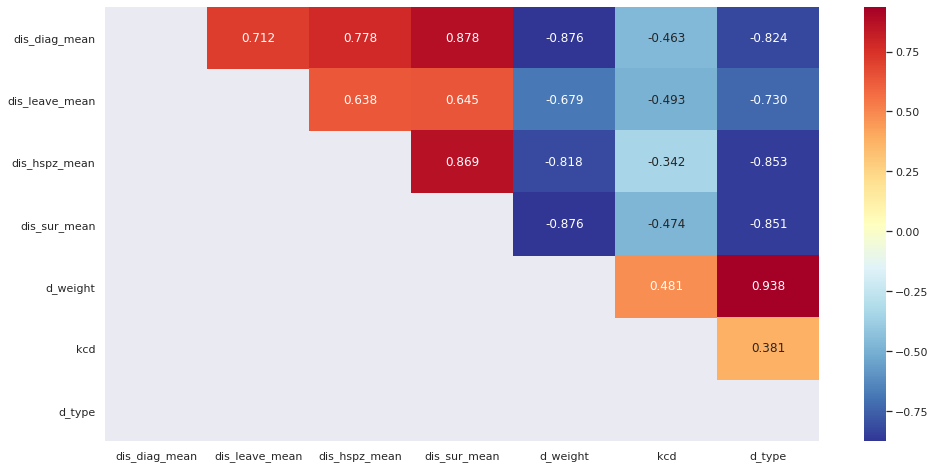

In [43]:
corr_mat=train[['dis_diag_mean', 'dis_leave_mean', 'dis_hspz_mean', 'dis_sur_mean', 'd_weight', 'kcd', 'd_type']].corr()
mask=np.zeros_like(corr_mat,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(16,8))
sns.heatmap(corr_mat,annot=True,cmap='RdYlBu_r',mask=mask,fmt='.3f')
plt.show()

- 질병 관련 정보와 질병별 청구보험금의 상관관계를 나타낸 결과 강한 음의 상관관계를 보입니다.     
이는 질병 등급이 **낮을수록(심각한 질병)일수록 질병별 청구보험금이 높아지는 경향**이 있음을 뜻합니다. 

- 치료행위에 따른 질병별 청구보험금끼리도 **높은 양의 상관관계**를 보입니다.   


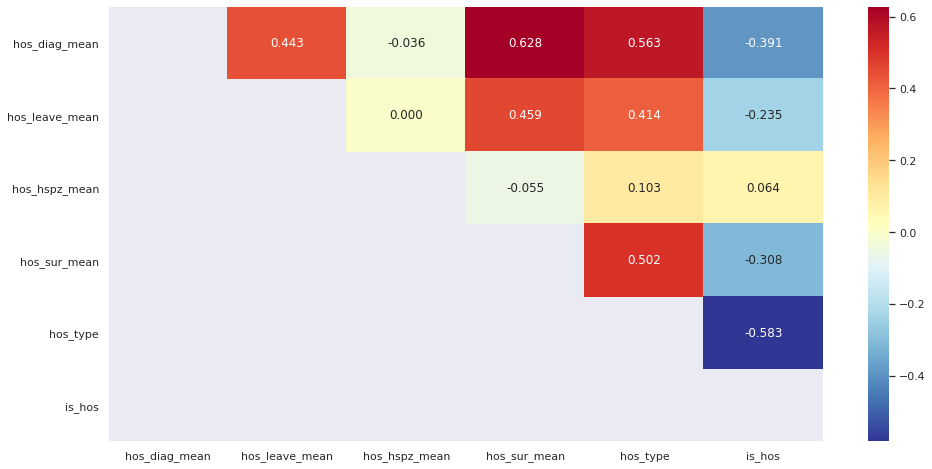

In [44]:
corr_mat=train[['hos_diag_mean', 'hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean', 'hos_type', 'is_hos']].corr()
mask=np.zeros_like(corr_mat,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(16,8))
sns.heatmap(corr_mat,annot=True,cmap='RdYlBu_r',mask=mask,fmt='.3f')
plt.show()

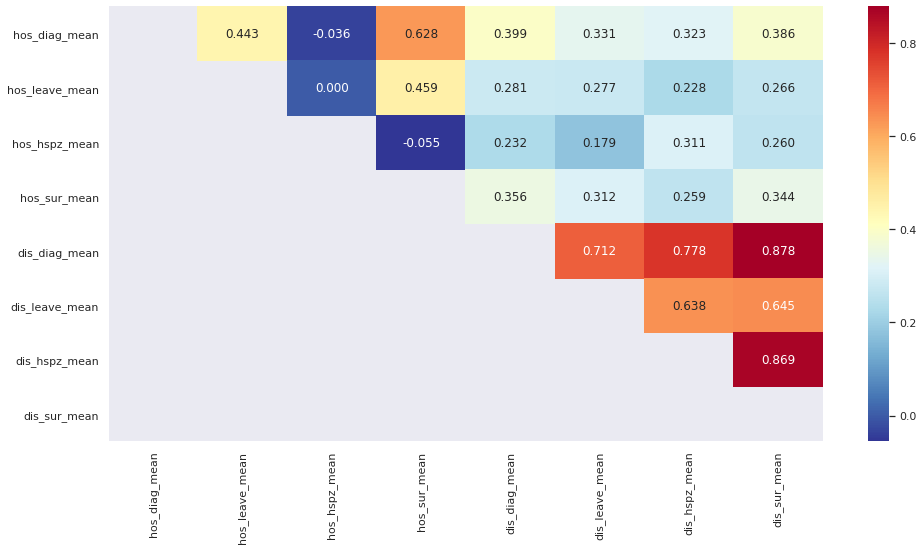

In [45]:
corr_mat=train[['hos_diag_mean', 'hos_leave_mean', 'hos_hspz_mean', 'hos_sur_mean', 'dis_diag_mean', 'dis_leave_mean', 'dis_hspz_mean', 'dis_sur_mean']].corr()
mask=np.zeros_like(corr_mat,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(16,8))
sns.heatmap(corr_mat,annot=True, cmap='RdYlBu_r', mask=mask,fmt='.3f')
plt.show()

병원별/질병별 청구보험금의 상관관계를 나타낸 결과, 병원과 질병별 청구보험금 자체 간의 상관관계가 그리 높진 않습니다. 

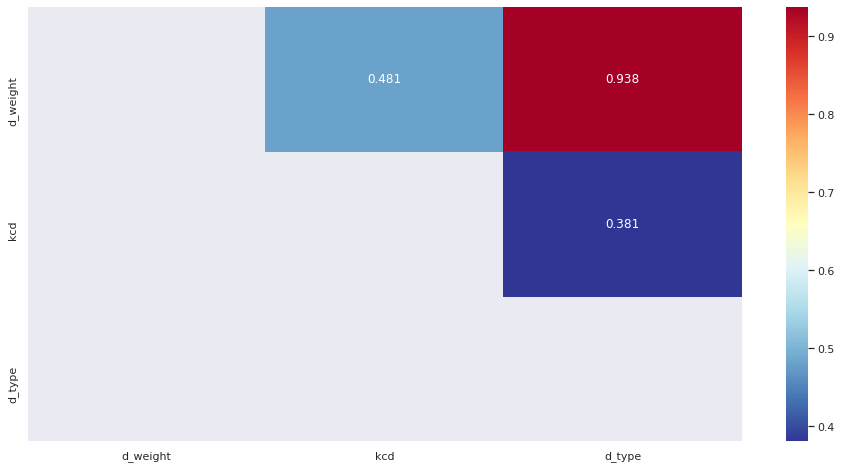

In [46]:
corr_mat=train[['d_weight', 'kcd', 'd_type']].corr()
mask=np.zeros_like(corr_mat,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(16,8))
sns.heatmap(corr_mat,annot=True,cmap='RdYlBu_r',mask=mask,fmt='.3f')
plt.show()

___


## **3) 고객 정보**
### 가. 연령정보

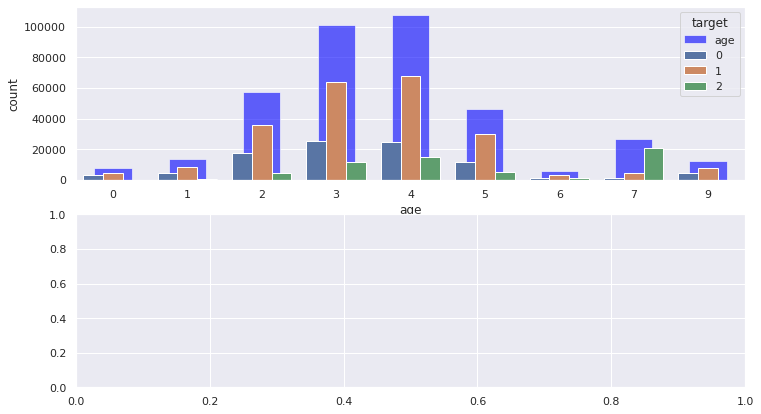

In [47]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1) # count
train['age'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
sns.countplot(data=train, x='age', hue='target')
plt.xticks(rotation=0)

plt.subplot(2,1,2) # rate

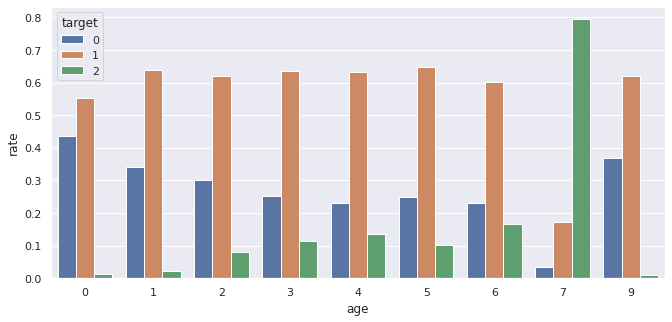

In [48]:
count_plot(train, 'age')

- 30~40대 회원이 많습니다. 

- 데이터 설명에는 7과 9범주가 나타나있지 않습니다. 하지만 두 범주는 꽤 나타납니다.    
따라서 6이 60세 이상인 것으로 보아 7을 70대정도로 추측하고, 9를 unknown으로 추측하였습니다.   
> 범주 7에서 **조사**의 비율이 눈에띄게 높습니다. 

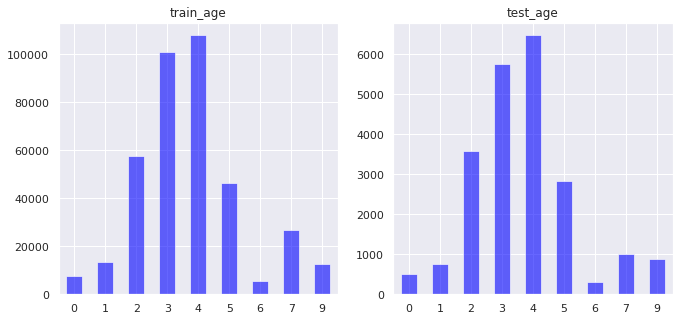

In [49]:
plt.subplot(1,2,1)
train['age'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
plt.title('train_age')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
test['age'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
plt.title('test_age')
plt.xticks(rotation=0)

plt.show()

train과 test의 나이 분포는 비슷하지만, test에서 9가 차지하는 비율이 조금 더 높음을 알 수 있습니다.   
범주 7과 9에 대한 처리가 필요해보입니다. 

### 나. 부정행위 정보

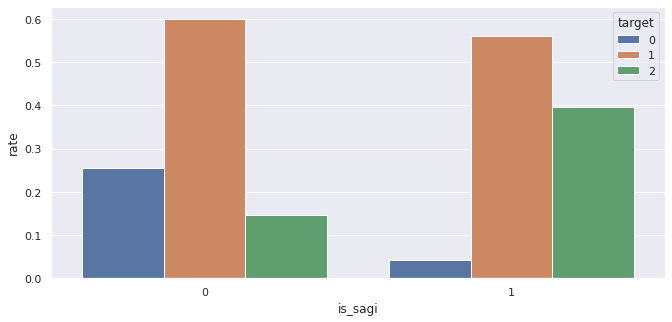

In [50]:
count_plot(train, 'is_sagi')

보험사기를 친 고객은 매우 적지만, 조사의 비율이 확실히 높음을 확인할 수 있습니다. 

----

## **4) 상품 정보** 
### 가. 계약 관련 
- **중도부가계약여부(is_add_con)** : 가입한 주계약에 내게 필요한 특약을 추가해 원하는 보장을 받을 수 있는것

- **건강인 우대계약(is_health_con)** : 흡연하지않고, 혈압과 BMI가 안정적인 건강한 자에게 부과되는 특약

  > 두 요인 모두 보험사에게 **긍정적인 이미지의 고객**을 나타내준다고 생각

- **부담보 5년 경과 여부(is_5)** : 특정 부위나 질병이 있다면, 사전에 고지해야 하며 이때 보험금을 받지 못하는 것을 부담보라고 칭함. 이는 기간제 부담보/전 기간 부담보로 나뉘는데 기간제 부담보는 1년~최대 5년까지 적용되고, 그 이후는 보험금 지급. 전 기간 부담보라고 해도 해당 부위가 완치됐다고 판단되면 부담보 해제 

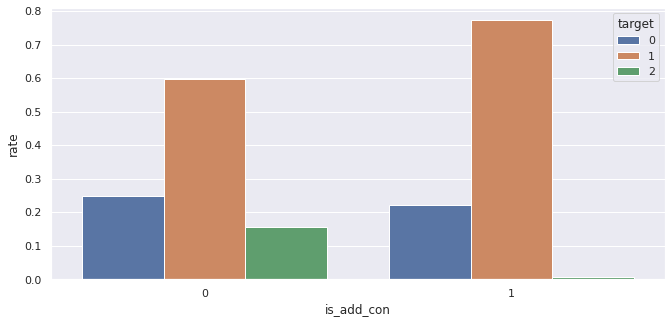

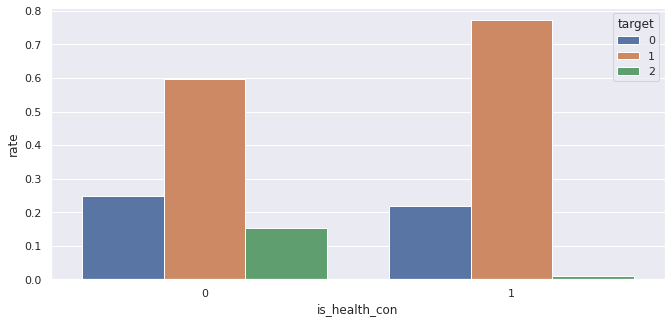

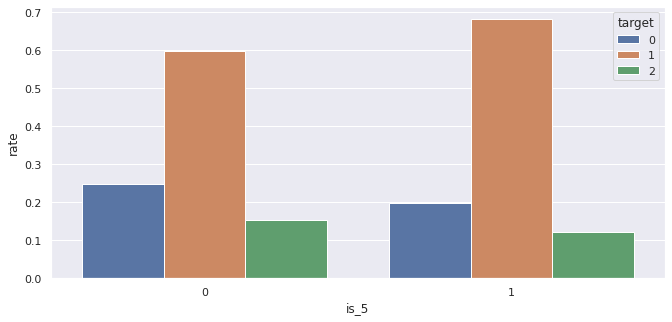

In [51]:
for i,col in enumerate(['is_add_con','is_health_con', 'is_5']):
  count_plot(train,col)

- 중도부가계약, 건강인 우대계약은 고객의 긍정적 이미지를 형성해, 조사의 비율이 확실히 낮음. 

- 부담보 5년 경과 여부는 비율에 크게 영향을 주지 않는 듯 하나, 5년이 경과되어 부담보였던 부위를 청구했을 가능성이 높기에 1 범주의 심사 비율이 0보다 높음. 

### 나. 부활일과 계약일 관련

- 계약일(date_con_diff)과 청구일이 짧으면, 보험청구를 하기 위해 보험을 계약했음을 알 수 있습니다. 따라서 이 또한 부정적인 요인으로 작용합니다. 

- 부활 : 약관이 정한 바에 따라 보험료를 납부하지 않고 일정 기일이 경과하면 그 계약은 해지되는데, 이 경우 보험 계약자의 청약에 따라 해지 이전으로 회복하는 제도. 
> 부활일과 청구일(date_rebirth_diff)이 짧으면, 청구하기 위해 보험 계약을 부활시켰음을 추측할 수 있습니다. 따라서 이는 부정적인 요인으로 작용한다고 추측했습니다. 


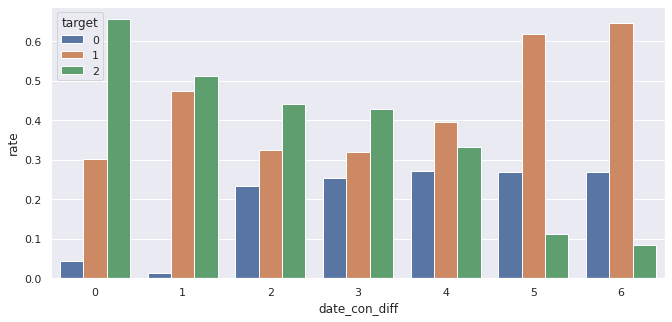

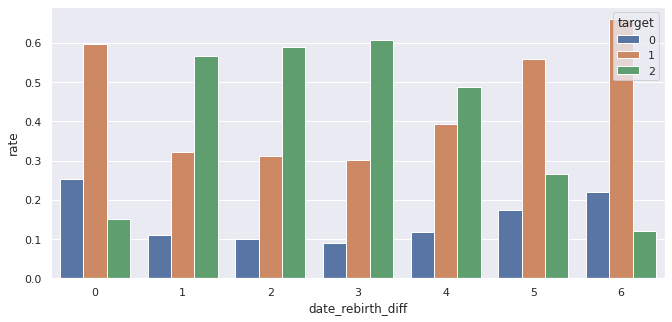

In [52]:
for i,col in enumerate(['date_con_diff', 'date_rebirth_diff']):
  count_plot(train,col)

- 계약일과 청구일이 짧을수록 조사의 비율이 월등히 높습니다. 
- 부활일과 청구일사이 기간이 길어질수록 조사의 비율이 낮아집니다. 

### 다. 가격 관련
> 청구 금액(want_price), 가입 금액(join_price), 보험료(month_price)

a. 가입금액

In [53]:
# 시각화에 사용할 함수
def count_plot(df,f):
    group=df.groupby([f,'target'])['base_ym'].count()
    group=group/group.groupby(level=0).sum()
    group=group.reset_index().rename(columns={'base_ym':'rate'})
    ax = sns.barplot(data=group,x=f,y='rate',hue='target')
    ax.get_legend().remove()
    plt.show()

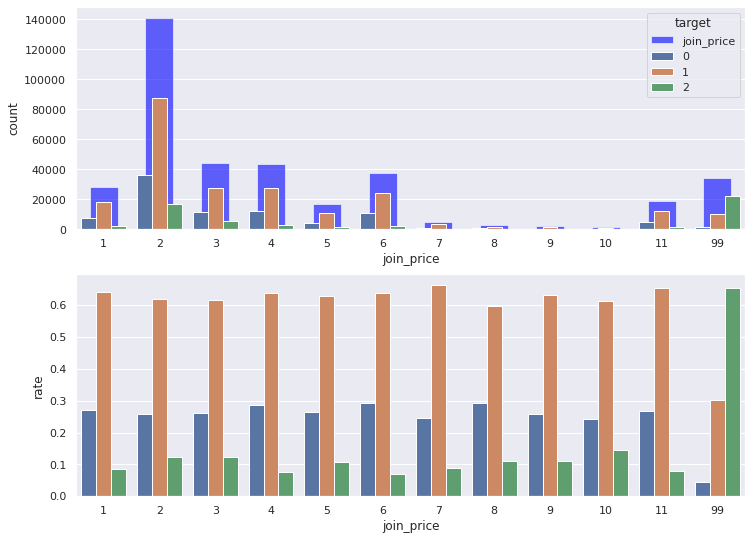

In [54]:
plt.figure(figsize=(12,9))

plt.subplot(2,1,1) # count
train['join_price'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
sns.countplot(data=train, x='join_price', hue='target')
plt.xticks(rotation=0)

plt.subplot(2,1,2) # rate
count_plot(train, 'join_price')

b. 보험료 구간

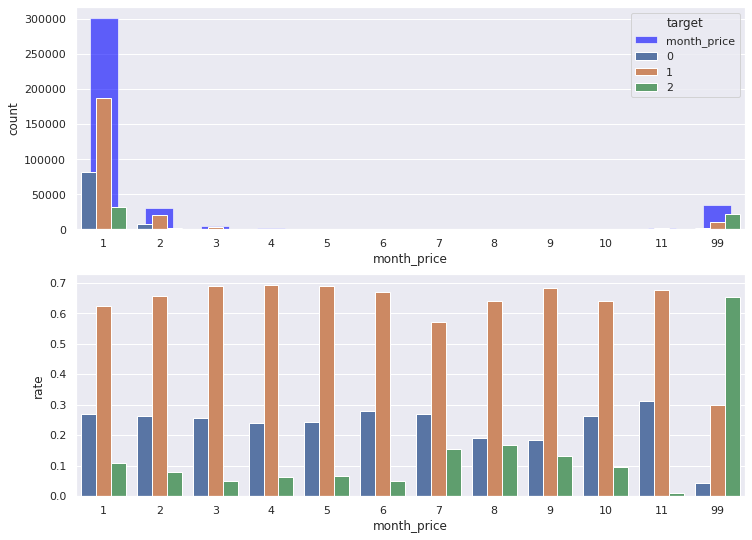

In [55]:
plt.figure(figsize=(12,9))

plt.subplot(2,1,1) # count
train['month_price'].value_counts().sort_index().plot.bar(color='blue',alpha=0.6)
sns.countplot(data=train, x='month_price', hue='target')
plt.xticks(rotation=0)

plt.subplot(2,1,2) # rate
count_plot(train, 'month_price')

가입금액과 보험료 구간 모두 unknown(99) 범주가 존재하며, 그 안에는 조사의 비율이 월등히 높습니다. 

In [56]:
train.query('join_price==99 & month_price==99').head()

,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean,target
7,7,201901,7,0.0,99,99,0,0,0,0,0,0,0,0,6,1,9,9,3,10,0.0,2.0000,2.0,0.0,0.3333,0.4648,2.0270,0.9925,1.0346,0.8507,0.0473,2.0129,1.2470,2
50,50,201901,7,0.0,99,99,0,0,0,0,0,0,0,0,28,3,4,9,2,2,0.0,0.0000,1.0,0.0,0.0000,0.0000,0.2703,0.5503,0.2002,0.0000,0.0000,0.1118,0.1368,1
96,96,201901,7,0.0,99,99,0,0,1,0,0,0,0,0,22,3,8,9,1,2,0.0,0.0000,2.0,0.0,0.0000,0.0000,0.0000,0.0000,0.4074,0.0000,0.0000,0.0023,0.1508,1
105,105,201901,7,0.0,99,99,0,0,1,1,0,0,0,0,10,2,5,9,2,8,0.0,0.6667,0.0,0.0,2.5833,0.0000,0.0000,2.8645,0.0000,0.0000,0.0000,0.6341,0.5966,2
108,108,201901,7,0.0,99,99,0,0,0,1,0,0,0,0,17,3,13,9,3,8,0.0,1.3333,0.0,0.0,1.7500,0.7925,1.4929,2.2777,1.9339,0.0000,0.1080,0.5008,0.1481,2


그리고 두 unknown은 항상 함께 존재합니다.    
전체 train데이터 중 3만개정도가 해당합니다. 이들 중에서는 청구보험금(want_price)도 0인 경우가 많습니다. 

> Q&A에 따르면 이들은 보험금이 지급되지 않은 경우이거나, 비식별화 과정에서 생겨난 경우라고 합니다.     
이들을 처리하는 것이 중요해보입니다. 


____

## 5) Unknown 값 관련
위 EDA를 통해 연령, 지역, 가입금액, 보험료 등에서 9가 포함된 unknown 값이 있음을 확인했습니다. 

우선 가입금액과 보험료가 모두 99인 unknown값을 따로 뽑아 양상을 확인하겠습니다. 
   


In [57]:
unknown = train.query('month_price==99 & join_price==99');unknown.head(3)

,ID,base_ym,age,want_price,join_price,month_price,date_con_diff,date_rebirth_diff,is_hos,is_sagi,is_add_con,is_health_con,is_seller,is_5,d_type,d_weight,kcd,location,hos_type,treatment,leave_count,hspz_count,surgery_count,tot_leave,tot_hos_date,hos_diag_mean,hos_leave_mean,hos_hspz_mean,hos_sur_mean,dis_diag_mean,dis_leave_mean,dis_hspz_mean,dis_sur_mean,target
7,7,201901,7,0.0,99,99,0,0,0,0,0,0,0,0,6,1,9,9,3,10,0.0,2.0,2.0,0.0,0.3333,0.4648,2.0270,0.9925,1.0346,0.8507,0.0473,2.0129,1.2470,2
50,50,201901,7,0.0,99,99,0,0,0,0,0,0,0,0,28,3,4,9,2,2,0.0,0.0,1.0,0.0,0.0000,0.0000,0.2703,0.5503,0.2002,0.0000,0.0000,0.1118,0.1368,1
96,96,201901,7,0.0,99,99,0,0,1,0,0,0,0,0,22,3,8,9,1,2,0.0,0.0,2.0,0.0,0.0000,0.0000,0.0000,0.0000,0.4074,0.0000,0.0000,0.0023,0.1508,1


2    0.654838
1    0.301051
0    0.044111
Name: target, dtype: float64


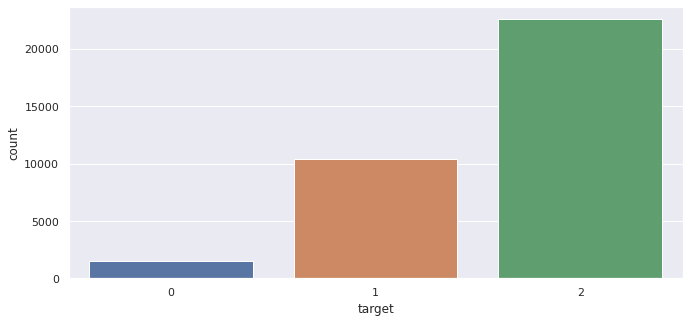

In [58]:
# target의 분포 확인
print(unknown['target'].value_counts()/len(unknown)) 
sns.countplot(data=unknown, x='target')

이들은 조사의 비율이 월등히 높다는 점에서 주목할 만 합니다. 

In [59]:
unknown_test = test.query('month_price==99 & join_price==99')
len(unknown_test)/len(test) 

0.05839978252990214

test 데이터에서도 이들은 약 5%에 해당합니다. 

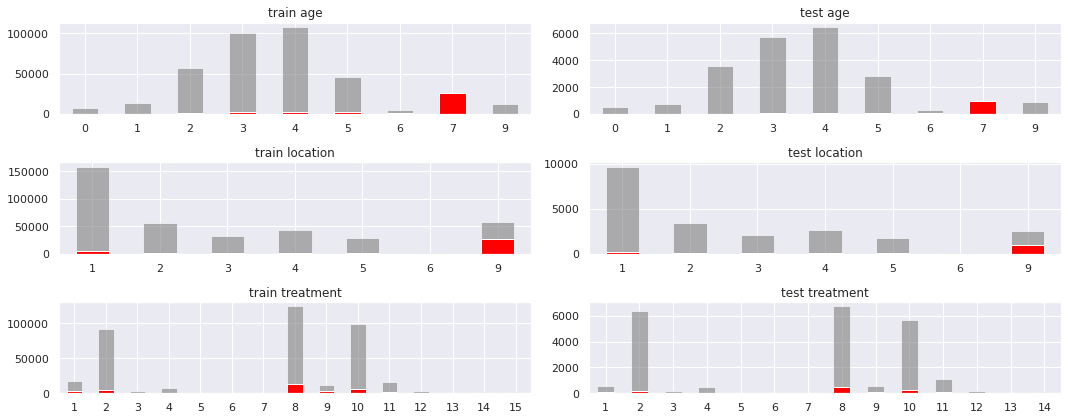

In [60]:
# train/ test unknown 통계량 차지 비율 파악
df = train.copy()
df_test = test.copy()
df_99 = unknown.copy()
df_99_test = unknown_test.copy()

plt.subplot(3,2,1)
df['age'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99['age'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('train age')
plt.xticks(rotation=0)

plt.subplot(3,2,2)
df_test['age'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99_test['age'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('test age')
plt.xticks(rotation=0)

plt.subplot(3,2,3)
df['location'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99['location'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('train location')
plt.xticks(rotation=0)

plt.subplot(3,2,4)
df_test['location'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99_test['location'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('test location')
plt.xticks(rotation=0)

plt.subplot(3,2,5)
df['treatment'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99['treatment'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('train treatment')
plt.xticks(rotation=0)
plt.subplot(3,2,6)

df_test['treatment'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99_test['treatment'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('test treatment')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

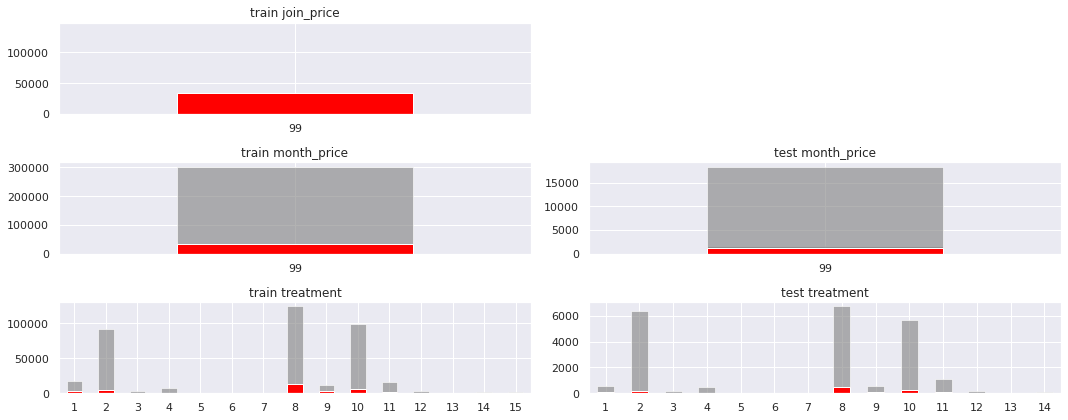

In [61]:
# train/ test unknown 통계량 차지 비율 파악
df = train.copy()
df_test = test.copy()
df_99 = unknown.copy()
df_99_test = unknown_test.copy()

plt.subplot(3,2,1)
df['join_price'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99['join_price'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('train join_price')
plt.xticks(rotation=0)

plt.subplot(3,2,4)
df_test['join_price'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99_test['join_price'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('test location')
plt.xticks(rotation=0)

plt.subplot(3,2,3)
df['month_price'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99['month_price'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('train month_price')
plt.xticks(rotation=0)

plt.subplot(3,2,4)
df_test['month_price'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99_test['month_price'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('test month_price')
plt.xticks(rotation=0)

plt.subplot(3,2,5)
df['treatment'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99['treatment'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('train treatment')
plt.xticks(rotation=0)
plt.subplot(3,2,6)

df_test['treatment'].value_counts().sort_index().plot.bar(color='gray',figsize=(15,6),alpha=0.6)
df_99_test['treatment'].value_counts().sort_index().plot.bar(color='red',figsize=(15,6))
plt.title('test treatment')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

보험료와 가입금액을 unknown에 해당하는 부분을 나이, 지역, 치료 행위 칼럼에서 분홍색으로 나타낸 결과는 위와 같습니다.   
또한 이들은 다음과 같은 공통된 특징을 가집니다. 

> - 계약일과 청구일의 간격이 0이다.   
> - 중도부가계약, 건강계약, 부실판매자가 아니다. 
> - 부활계약이 아닐 확률, 요양병원이 아닐 확률, 5년 경과했을 확률이 낮다. 